# Tutorial on How to Programm Quantum Computers

Author: Tobias Stollenwerk, Institute for Quantum Computing Analytics (PGI-12), FZ Jülich



In [1]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import StatevectorSimulator, QasmSimulator
from qiskit.visualization import array_to_latex, plot_histogram

Load latex packages and define latex macros. See [here](https://docs.mathjax.org/en/latest/input/tex/extensions.html#loading-tex-extensions)

$$
\newcommand{\bra}[1]{\langle #1 |}
\newcommand{\ket}[1]{| #1 \rangle}
\newcommand{\ee}{\mathrm{e}}
\newcommand{\ii}{\mathrm{i}}
$$

## Session 1 - Building a quantum circuit

We start with an empty circuit consisting of a single qubit

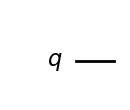

In [2]:
# Create a Quantum Circuit acting on the 1 qubit register
circuit = QuantumCircuit(1)
# display the circuit
display(circuit.draw('mpl'))

### Exercise 01

Create a circuit with a single Hadamard gate and display it

In [3]:
circuit = QuantumCircuit(1)
# ...
# fill in you code here
# ...


In [4]:
# uncomment the next line to get a hint
#%run -i solutions/hint01.py
# uncomment the next line to show the solution
#%load solutions/exercise01.py

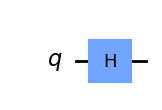

In [5]:
# run this cell to execute the solution
%run -i solutions/exercise01.py

### Exercise 02

Build a quantum circuit which applies a Hadamard gate to the first qubit before applying a CNOT gate

In [6]:
# ...
# fill in you code here
# ...


In [7]:
# uncomment the next line to get a hint
#%run -i solutions/hint02.py
# uncomment the next line to show the solution
#%load solutions/exercise02.py

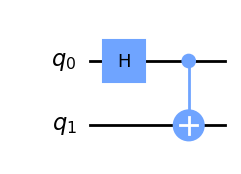

In [8]:
# run this cell to execute the solution
%run -i solutions/exercise02.py

### Exercise 03

Take the circuit of exercise 02 and add measurements to the two qubits.

Hint: Create two classical bits in addition to the two quantum bits via ```QuantumCircuit(2, 2)```

In [9]:
# ...
# fill in you code here
# ...


In [10]:
# uncomment the next line to get a hint
#%run -i solutions/hint03.py
# uncomment the next line to show the solution
#%load solutions/exercise03.py

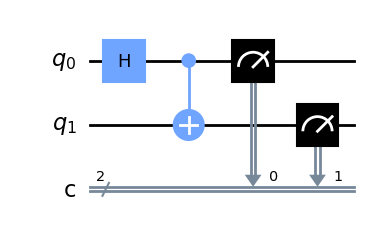

In [11]:
# run this cell to execute the solution
%run -i solutions/exercise03.py

## Session 2 - Using the simulator to calculate the resulting state

In order to execute a circuit, i.e. to calculate the resulting state, we use the build-in simulator. This will return a ```result``` object, from which we can extract a ```statevector``` object. 

We will exclude the mesurements for now and focus on the circuit from exercise 02

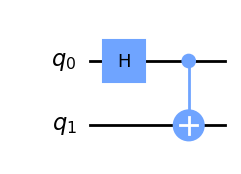

In [12]:
%run -i solutions/exercise02.py

In [13]:
simulator = StatevectorSimulator()
job = simulator.run(circuit)
result = job.result()
statevector = result.get_statevector()
statevector

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


We can display it a little nicer via the ```draw```command 

In [14]:
display(statevector.draw(output='latex'))

<IPython.core.display.Latex object>

### Exercise 04 

Create a circuit with one qubit and apply the rotation gate ```rx(angle)``` with different angles (e.g. 0, 0.2, 0.4 .., np.pi) to it. Aferwards display the resulting statevector after each rotation as a point on the Bloch sphere (Hint: execute ```statevector.draw?``` to show the documentation)

In [15]:
# ...
# fill in you code here
# ...

Angle= 0 * pi / 10


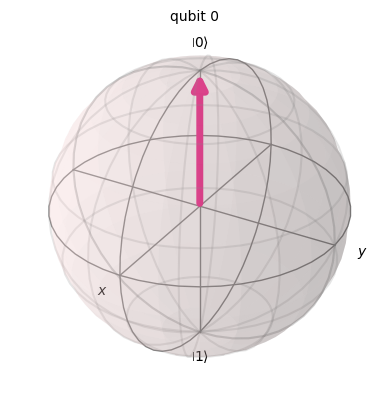

Angle= 1 * pi / 10


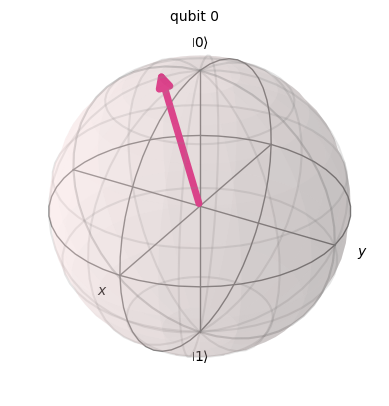

Angle= 2 * pi / 10


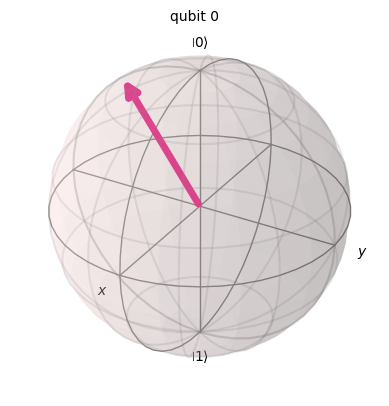

Angle= 3 * pi / 10


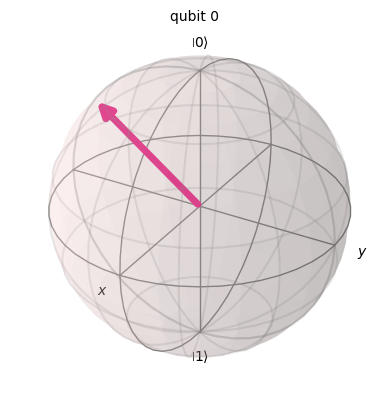

Angle= 4 * pi / 10


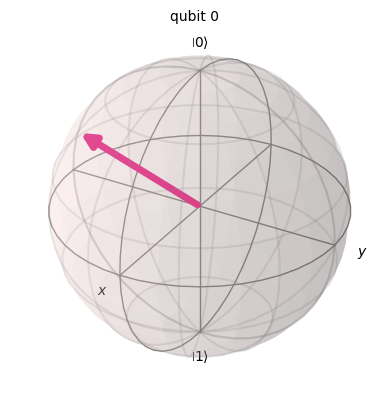

Angle= 5 * pi / 10


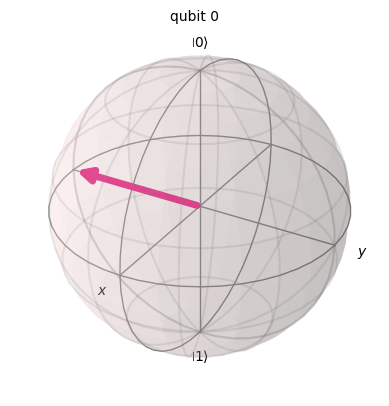

Angle= 6 * pi / 10


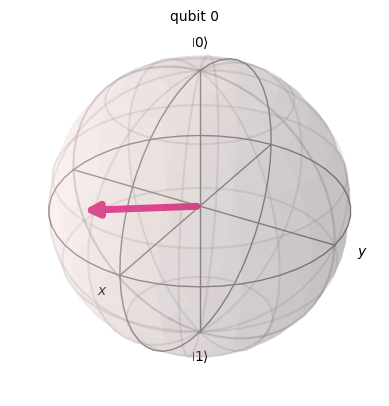

Angle= 7 * pi / 10


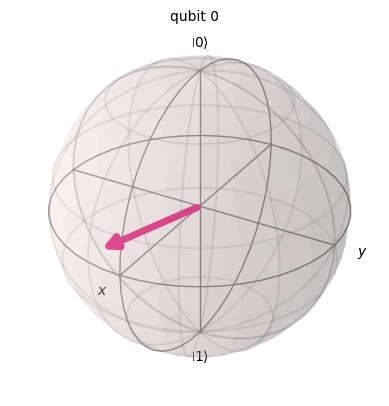

Angle= 8 * pi / 10


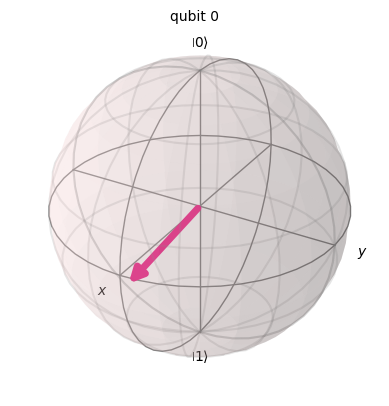

Angle= 9 * pi / 10


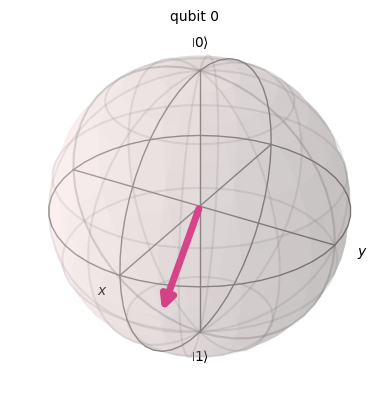

Angle= 10 * pi / 10


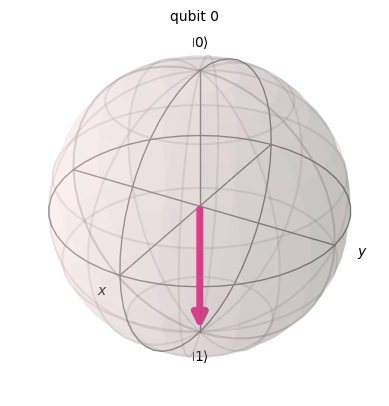

In [16]:
# run this cell to execute the solution
%run -i solutions/exercise04.py

### Exercise 05

On a real quantum computer the state vector is not accessible. Instead we need to use measurements to estimate the amplitutes. The simulation of such measurements can be done with the `QasmSimulator` instead of the above uses `StatevectorSimulator`. 

Use the the `QasmSimulator` to simulate measurements of the circuit from exercise 03. Investigate how the number of measurements (use the 'shots' argument in the `run` command of the simulator) affects the outcome

In [17]:
circuit = QuantumCircuit(2, 2)
# add hadamard gate
circuit.h(0)
circuit.cnot(0, 1)
circuit.measure(0, 0)
circuit.measure(1, 1);


# ...
# fill in you code here
# ...

#simulator = QasmSimulator()
# Hint: Get the measurement outcome (number of times 00, 01, 10 or 11 are measured)
# counts = result.get_counts()
# Hint: Use the plot_histogram function to plot a histogram of the simulated measurement outcome
# plot_histogram(counts)


Num shots: 10


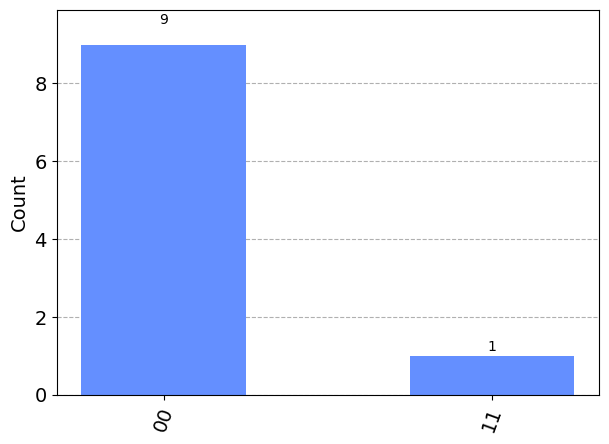

Num shots: 100


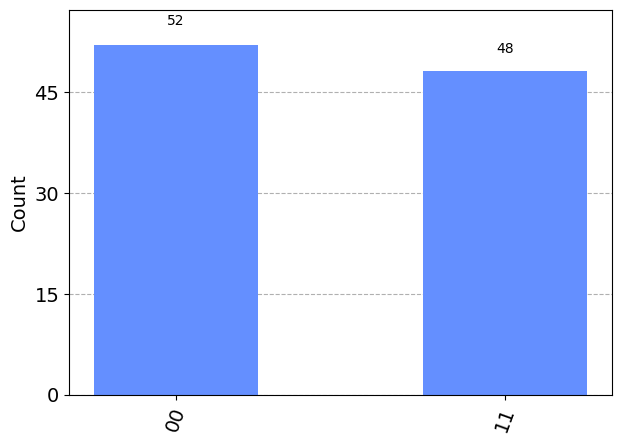

Num shots: 1000


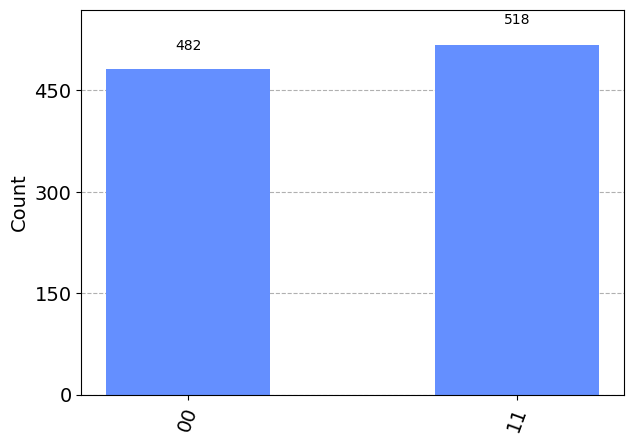

Num shots: 10000


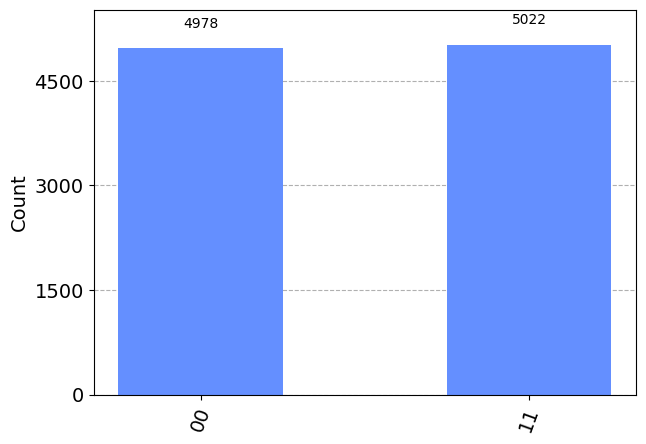

In [18]:
# run this cell to execute the solution
%run -i solutions/exercise05.py

## Session 3 - Quantum Teleportation

We want to simulate and investigate quantum teleportation as shown here

Classical and quantum registers can be given names as follows:

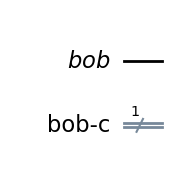

In [19]:
Bobs_q = QuantumRegister(1, name='bob')
Bobs_c = ClassicalRegister(1, name='bob-c')
circuit = QuantumCircuit(Bobs_q, Bobs_c)
display(circuit.draw(output='mpl'))

### Exercise 06:

Add a quantum register with on qubit and a classical register with two bits for Alice to the above circuit

In [20]:
# ...
# fill in you code here
# ...

In [21]:
# run this cell to execute the solution
%run -i solutions/exercise06.py

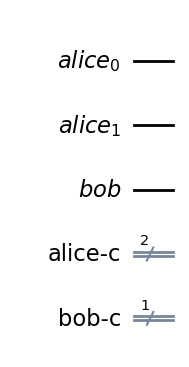

In [22]:
display(circuit.draw(output='mpl'))

### Exercise 07

Initialize a quantum state to be teleported in a state with 80% probability for $\ket{0}$ and 20% probability for $\ket{1}$, on the first of Alice's qubits.

In [23]:
# ...
# fill in you code here
# ...
# Hint: use the following function
# circuit.initialize([amp0, amp1], 0)
# where amp0, amp1 are the amplitutes for the 0 and 1 qubit state respectively

In [24]:
# run this cell to execute the solution
%run -i solutions/exercise07.py

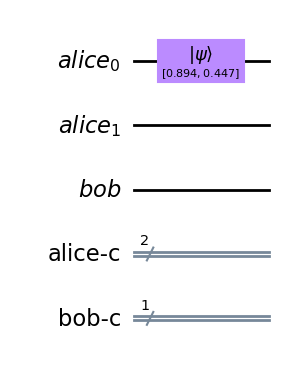

In [25]:
display(circuit.draw(output='mpl'))

## Exercise 08

As a first step, Alice an Bob share an entangled state. The so called Bell-State
$$
\frac{\sqrt{2}}{2} |00\rangle+\frac{\sqrt{2}}{2} |11\rangle
$$
between Alice's second qubit and Bob's qubit. Add this to the circuit.

In [26]:
# ...
# fill in you code here
# ...
# Hint: Confer exercise 02

In [27]:
# run this cell to execute the solution
%run -i solutions/exercise08.py

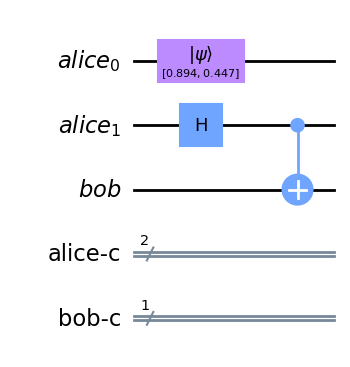

In [28]:
display(circuit.draw(output='mpl'))

## Exercise 09

Next, Alice performes a Bell-State measurement on both of her qubits, i.e. she projects her two qubit state to one of the states
$$
\frac{\sqrt{2}}{2} |00\rangle \pm \frac{\sqrt{2}}{2} |11\rangle
$$.

This can be implemented by a 

 - CNOT between first and second qubits
 - followed by a Hadamard on the first qubit
 - Measuring both of Alice's qubits and storing the results in both of Alice's bits
 
Add the above steps to the circuit

In [29]:
# ...
# fill in you code here
# ...

In [30]:
# run this cell to execute the solution
%run -i solutions/exercise09.py

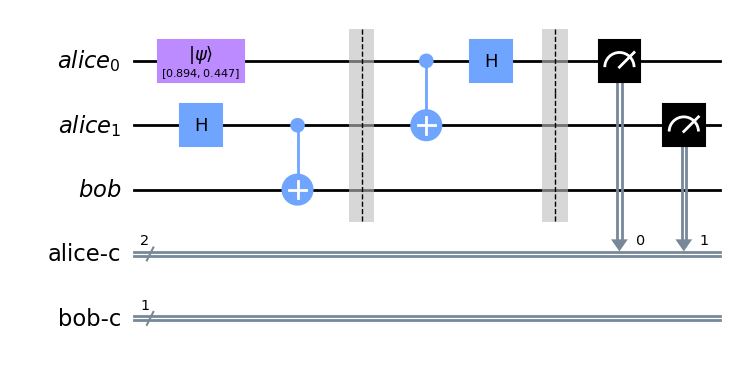

In [31]:
display(circuit.draw(output='mpl'))

### Exercise 10

Depending on the measurement outcome of Alice, Bob needs to apply certain transformation to his qubit in order to transfer it to the original state.

If the measurement outcome of the Alice's second qubit is 1, Bob needs to apply a Pauli X gate.  If the measurement outcome of the Alice's first qubit is 1, Bob needs to apply a Pauli Z gate, afterwards.

In order to quantum gates condition on the value of classical bit, use
`.c_if(<classical-bit>, <value-of-classical-bit'` on the quantum gate. For example
```
circuit.x(bobs_q).c_if(bob-c, 1)
```

In [32]:
# ...
# fill in you code here
# ...

In [33]:
# run this cell to execute the solution
%run -i solutions/exercise10.py

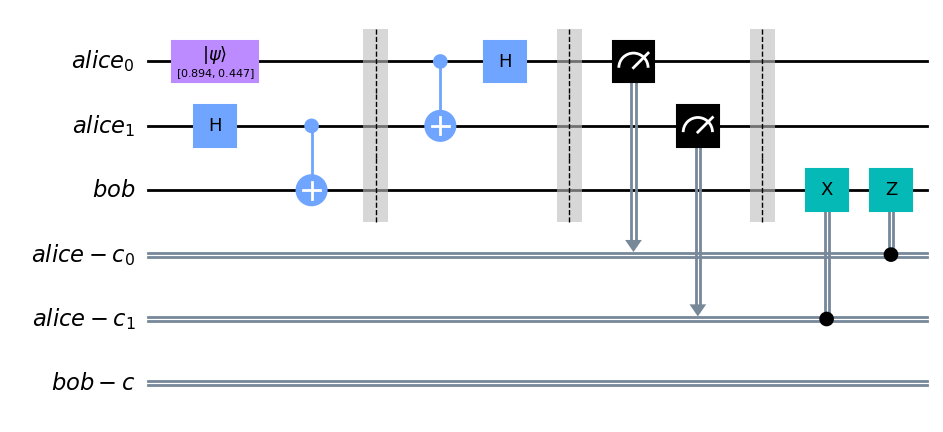

In [34]:
display(circuit.draw(output='mpl', cregbundle=False))

### Exercise 11

Use the `StatevectorSimulator` to print out the state of the circuit  

 - right after the initialization of the state to transport
 - right after the the hadamard and CX between Alice's second qubit and Bob's qubit
 - right after the the CX and Hadamer between both Alice's qubits
 - right after the each measurement
 - at the end
 
Run this multiple times to see what happens with different measurement outcomes


In [35]:
# ...
# fill in you code here
# ...
# Hint: define a function for calculating the statevector
# def get_statevector(circuit)
# ...
# return statevector
# 
# Hint: Print the state with
# display(get_statevector(circuit).draw(output='latex'))
# NOTE: This will display the first qubit to the far right and the last to the far left!


In [36]:
# run this cell to execute the solution
%run -i solutions/exercise11.py

After: Prepare circuit


<IPython.core.display.Latex object>

After: Initialize


<IPython.core.display.Latex object>

After: Entanglement between A and B


<IPython.core.display.Latex object>

After: Entanglement in A


<IPython.core.display.Latex object>

After: After first measurement


<IPython.core.display.Latex object>

After: After second measurement


<IPython.core.display.Latex object>

After: After B's corrections


<IPython.core.display.Latex object>

### Exercise 12

Finally measure Bob's qubit, simulate the circuit with 10000 shots and plot a histogram of the result. Can you confirm Alice's state?

In [37]:
# ...
# fill in you code here
# ...

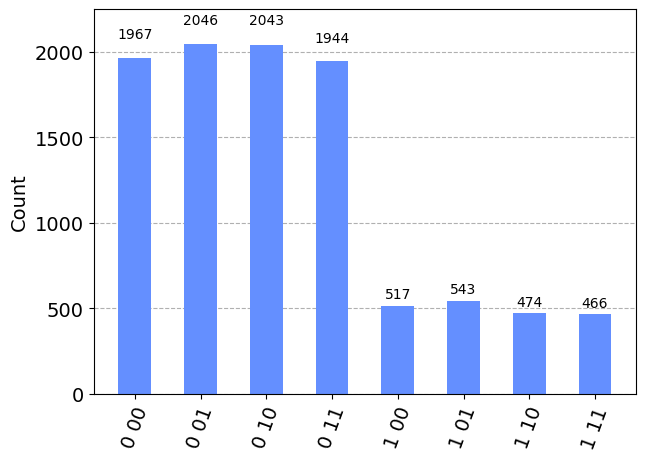

In [38]:
# run this cell to execute the solution
%run -i solutions/exercise12.py